<a href="https://colab.research.google.com/github/SinghRaghvendra/DSPortfolio/blob/main/Prediction_of_Wine_type_using_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

You can upload files from your local system to the Colab environment using the `files.upload` utility. This will open a file selection dialog in your browser.

In [3]:
from google.colab import files

uploaded = files.upload()

Saving whitewinequality.csv to whitewinequality.csv
Saving redwinequality.csv to redwinequality.csv


Once the file is uploaded, you can access it by its name. For example, if you uploaded a CSV file named `my_local_data.csv`, you can load it into a pandas DataFrame like this:

In [5]:
import pandas as pd

# Assuming you uploaded a file named 'my_local_data.csv'
file_name = 'my_local_data.csv'

# Check if the file was uploaded
if file_name in uploaded:
    df = pd.read_csv(file_name)
    display(df.head())
else:
    print(f"File '{file_name}' not found. Please ensure you uploaded the correct file.")

File 'my_local_data.csv' not found. Please ensure you uploaded the correct file.


In [6]:
red = pd.read_csv("redwinequality.csv", sep=';')
white = pd.read_csv("whitewinequality.csv", sep=';')

red['type'] = 1
white['type'] = 0

wines = pd.concat([red, white], ignore_index=True)
wines.dropna(inplace=True)

In [11]:
red.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [10]:
white.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,0


In [13]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [15]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [17]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [18]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


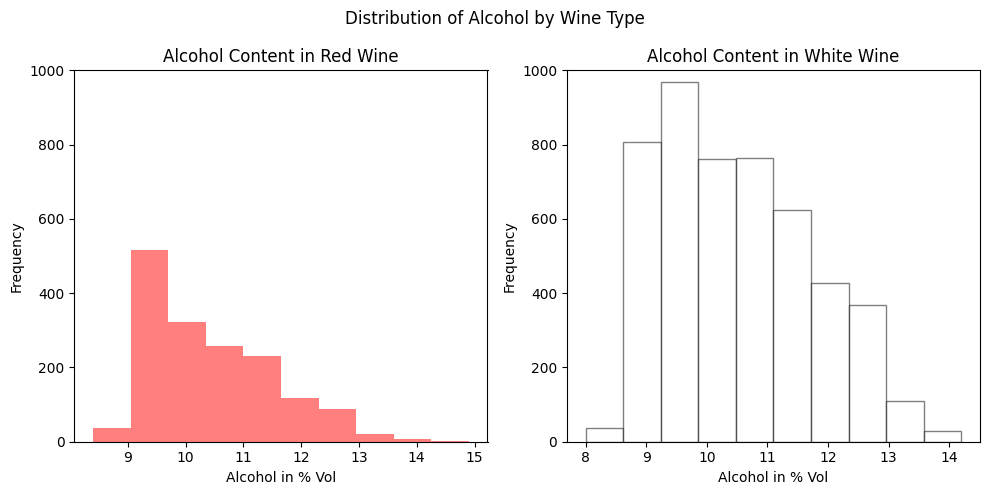

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(wines[wines['type'] == 1].alcohol, bins=10, facecolor='red', alpha=0.5, label='Red wine')
ax[1].hist(wines[wines['type'] == 0].alcohol, bins=10, facecolor='white', edgecolor='black', lw=0.5, alpha=0.5, label='White wine')

for a in ax:
    a.set_ylim([0, 1000])
    a.set_xlabel('Alcohol in % Vol')
    a.set_ylabel('Frequency')

ax[0].set_title('Alcohol Content in Red Wine')
ax[1].set_title('Alcohol Content in White Wine')

fig.suptitle('Distribution of Alcohol by Wine Type')
plt.tight_layout()
plt.show()

# Task
Calculate the pairwise correlation between all columns in the `wines` DataFrame and generate a correlation heatmap to visualize the relationships between features, including 'quality' and 'type'.

## Calculate Correlations

### Subtask:
Calculate the pairwise correlation between all columns in the `wines` DataFrame.


**Reasoning**:
To calculate the pairwise correlation between all columns in the `wines` DataFrame, I will use the `.corr()` method and store the result in `correlation_matrix`.



In [20]:
correlation_matrix = wines.corr()
print("Correlation matrix calculated.")

Correlation matrix calculated.


## Generate Correlation Heatmap

### Subtask:
Create a heatmap to visualize the correlation matrix. This will help us understand how different features relate to each other, as well as to the 'quality' and 'type' of wine. Ensure the heatmap includes labels for better readability.


**Reasoning**:
To visualize the correlation matrix, I will create a heatmap using the `seaborn` library as requested in the subtask instructions.



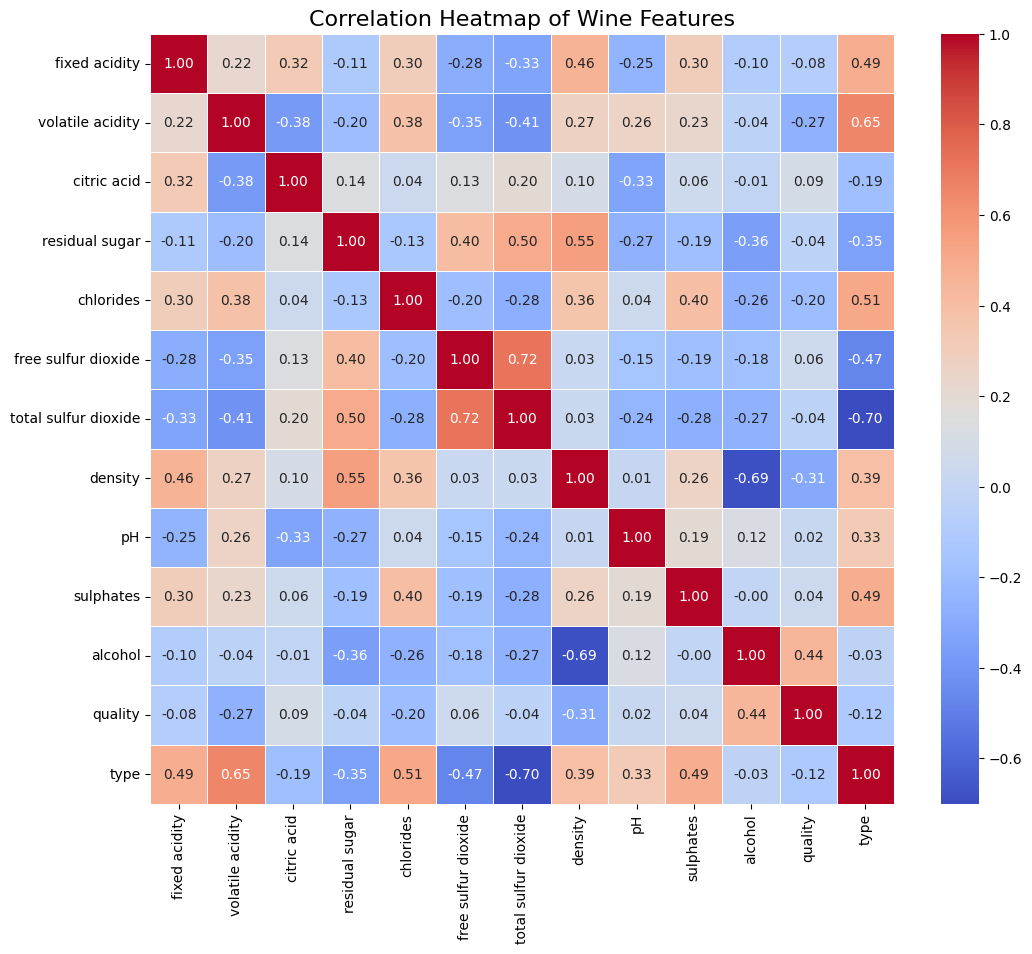

Correlation heatmap generated.


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Wine Features', fontsize=16)
plt.show()
print("Correlation heatmap generated.")

## Final Task

### Subtask:
Review the correlation heatmap to identify strong positive or negative correlations among features, especially with 'quality' and 'type'.


## Summary:

### Data Analysis Key Findings

*   A correlation matrix was successfully calculated for all columns in the `wines` DataFrame.
*   A correlation heatmap was generated, visualizing the relationships between wine features.
*   The heatmap shows correlation coefficients, allowing for the identification of strong positive or negative correlations among features.

### Insights or Next Steps

*   Analyze the correlation heatmap to pinpoint specific features that exhibit strong correlations (positive or negative) with `quality` and `type` to understand their influence.
*   Focus on highly correlated features with `quality` for potential feature engineering or predictive modeling to improve wine quality prediction.


In [22]:
X = wines.iloc[:, :-1]
y = wines['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=45)

In [23]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [29]:
y, X

(0       1
 1       1
 2       1
 3       1
 4       1
        ..
 6492    0
 6493    0
 6494    0
 6495    0
 6496    0
 Name: type, Length: 6497, dtype: int64,
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4              0.70         0.00             1.9      0.076   
 1               7.8              0.88         0.00             2.6      0.098   
 2               7.8              0.76         0.04             2.3      0.092   
 3              11.2              0.28         0.56             1.9      0.075   
 4               7.4              0.70         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 6492            6.2              0.21         0.29             1.6      0.039   
 6493            6.6              0.32         0.36             8.0      0.047   
 6494            6.5              0.24         0.19             1.2      0.041   
 6495            5

In [30]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=12))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1)

Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9713 - loss: 0.0923
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9782 - loss: 0.0796
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9700 - loss: 0.0901


In [34]:
y_pred = model.predict(X_test)

y_pred_labels = (y_pred >= 0.5).astype(int)

for prediction in y_pred_labels[:12]:
    wine_type = "Red wine" if prediction == 1 else "White wine"
    print(f"Prediction: {wine_type}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: Red wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: White wine


# Task
Evaluate the deep learning model's performance by calculating and displaying its accuracy, precision, recall, and F1-score on the test set. Additionally, visualize the model's performance by generating and plotting a confusion matrix and an ROC curve, along with its Area Under the Curve (AUC). Conclude by summarizing these metrics and visualizations to highlight the model's strengths and weaknesses.

## Evaluate Model Performance

### Subtask:
Calculate and display the accuracy, precision, recall, and F1-score of the deep learning model on the test set (`X_test`, `y_test`).


**Reasoning**:
To evaluate the model's performance as requested, I need to import specific metrics from `sklearn.metrics` and then calculate and print them using the true labels (`y_test`) and predicted labels (`y_pred_labels`).



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")